In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from datetime import datetime, timedelta
import time
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import pandas_datareader as pdr
from pandas_datareader import data

In [55]:
file=pd.ExcelFile('E:/SPO_Data.xlsx')
stockData=file.parse('Fundamentals')

In [56]:
stockData.head()

,Symbol,Name,P/E,EPS,MarketCap
0,MMM,3M Company,23.17,8.16,112.74
1,ABT,Abbott Laboratories,48.03,0.94,77.76
2,ABBV,AbbVie,17.55,3.63,101.52
3,ACN,Accenture plc,18.37,6.76,77.29
4,ATVI,Activision Blizzard,37.55,1.28,36.13


In [57]:
stockDataCopy=stockData.copy()
stockDataCopy.drop('Name', inplace=True,axis=1)

In [58]:
stockDataCopy.reindex(index=stockDataCopy['Symbol'],columns=stockDataCopy.columns)

,Symbol,P/E,EPS,MarketCap
Symbol,,,,
MMM,NaN,NaN,NaN,NaN
ABT,NaN,NaN,NaN,NaN
ABBV,NaN,NaN,NaN,NaN
ACN,NaN,NaN,NaN,NaN
ATVI,NaN,NaN,NaN,NaN
...,...,...,...,...
YHOO,NaN,NaN,NaN,NaN
YUM,NaN,NaN,NaN,NaN
ZBH,NaN,NaN,NaN,NaN


In [59]:
stockDataCopy['Symbol']=stockData['Symbol'].values
stockDataCopy['P/E']=stockData['P/E'].values
stockDataCopy['EPS']=stockData['EPS'].values
stockDataCopy['MarketCap']=stockData['MarketCap'].values

In [60]:
stockDataCopy.head()

,Symbol,P/E,EPS,MarketCap
0,MMM,23.17,8.16,112.74
1,ABT,48.03,0.94,77.76
2,ABBV,17.55,3.63,101.52
3,ACN,18.37,6.76,77.29
4,ATVI,37.55,1.28,36.13


In [61]:
stock_kmeans=KMeans()

In [62]:
class Get_K(object):
  def __init__(self,start,stop,X):
      self.start=start
      self.stop=stop
      self.X=X
      self.X=self.X.fillna(value = 0)

  def get_k(self):
      self.errors=[ ]
      Range=range(self.start,self.stop)
      for i in Range:
          self.k_means=KMeans(n_clusters=i)
          self.k_means.fit(self.X)
          self.errors.append(sum(np.min(cdist(self.X[0:200],self.k_means.cluster_centers_,'euclidean'),axis=1))/200)
      return

  def plot_elbow(self):
      with plt.style.context(['seaborn-notebook','ggplot']):
          plt.figure(figsize=(10,8))
      plt.plot(self.X['P/E'][0:200],self.errors[0:200])
      plt.xlabel('Clusters')
      plt.ylabel('Errors')
      plt.title('K-Means Elbow Plot')
      plt.tight_layout()
      plt.show()
      return


In [63]:
features=stockDataCopy[['P/E','EPS','MarketCap']]
Find_K=Get_K(1,200,features [1:200])
Find_K.get_k()

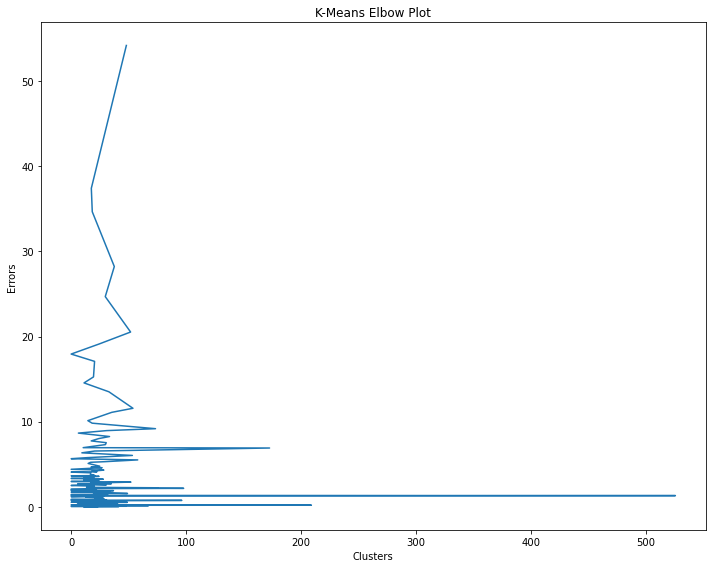

In [64]:
Find_K.plot_elbow()

In [80]:
strategy_kmeans = KMeans(n_clusters = 100)

In [81]:
strategy_kmeans.fit(features.fillna(0))

KMeans(n_clusters=100)

In [82]:
strategy_kmeans.labels_

array([31, 72,  6, 22, 70, 50, 32, 92, 49, 43, 61, 71,  7, 28, 33, 61, 61,
       42, 50, 46, 68, 59,  0, 98,  8, 90, 10, 41, 86, 28, 22, 53, 32,  7,
       34, 34, 92, 25, 99, 81, 37, 43,  0, 91, 13, 16, 56, 96, 12, 59, 45,
       36, 91, 29, 87, 76, 94, 59, 39, 15, 36, 68, 86, 56, 70, 45, 49, 97,
       38, 38, 87, 31, 57, 79, 52,  6, 65, 49, 41, 97, 12, 68, 89,  0, 41,
       27, 53, 50, 41, 96, 40, 41, 92, 41,  7, 49, 11, 83, 58, 80,  3, 69,
       92, 56, 12, 41, 92, 95, 95, 30, 92, 29, 41, 41,  2, 56, 73,  2, 92,
        7, 48, 53, 34,  0, 86, 73, 91, 52, 59, 29,  0, 55, 97, 69, 41, 97,
       56, 34, 27,  7, 39, 15, 71, 97, 97, 34, 30, 43, 92, 22, 30, 30, 73,
       11, 33, 13, 61, 71, 27, 75,  0, 68,  0, 56, 12, 49, 53, 12,  7, 23,
       86, 68, 75, 30, 75, 82, 59, 27, 92, 60, 92, 14,  7, 33, 11, 64, 34,
       49, 48, 37, 50, 33, 59, 33, 87, 61, 89, 99, 59, 34, 91, 49, 13, 13,
       69,  5, 34, 56, 53, 41, 78, 15, 88, 45, 92, 21, 87, 13, 59, 41, 30,
       41, 71, 92, 49, 92

In [83]:
stockDataCopy.head()

,Symbol,P/E,EPS,MarketCap,Clusters
0,MMM,23.17,8.16,112.74,14
1,ABT,48.03,0.94,77.76,0
2,ABBV,17.55,3.63,101.52,14
3,ACN,18.37,6.76,77.29,7
4,ATVI,37.55,1.28,36.13,23


In [84]:
stockDataCopy['Clusters'] = strategy_kmeans.labels_

In [85]:
stockDataCopy.head()

,Symbol,P/E,EPS,MarketCap,Clusters
0,MMM,23.17,8.16,112.74,31
1,ABT,48.03,0.94,77.76,72
2,ABBV,17.55,3.63,101.52,6
3,ACN,18.37,6.76,77.29,22
4,ATVI,37.55,1.28,36.13,70


In [86]:
from collections import Counter

In [72]:
cluster_counts = Counter(stockDataCopy['Clusters'])

In [73]:
print(cluster_counts)

Counter({3: 112, 17: 68, 19: 65, 23: 43, 13: 40, 9: 33, 0: 25, 7: 25, 10: 20, 6: 14, 18: 12, 22: 12, 14: 11, 21: 6, 2: 4, 16: 3, 1: 2, 24: 2, 15: 2, 12: 1, 11: 1, 4: 1, 8: 1, 5: 1, 20: 1})


In [74]:
cluster_pairs_df = pd.DataFrame()
pd.concat(i for cluster_pairs, i in stockDataCopy.groupby(stockDataCopy['Clusters']) if len(i) > 1)

,Symbol,P/E,EPS,MarketCap,Clusters
1,ABT,48.03,0.94,77.76,0
6,ADBE,51.72,2.32,59.28,0
68,BIIB,17.19,16.93,62.86,0
69,BLK,20.24,19.04,62.86,0
96,SCHW,31.80,1.31,55.61,0
...,...,...,...,...,...
412,LUV,16.02,3.55,34.96,23
419,SYK,29.69,4.35,48.15,23
480,WM,27.43,2.65,31.97,23
169,EQIX,209.05,1.79,26.88,24


In [75]:
test = pd.concat(i for cluster_pairs, i in stockDataCopy.groupby(stockDataCopy['Clusters']) if len(i) > 1)

In [76]:
test.head()

,Symbol,P/E,EPS,MarketCap,Clusters
1,ABT,48.03,0.94,77.76,0
6,ADBE,51.72,2.32,59.28,0
68,BIIB,17.19,16.93,62.86,0
69,BLK,20.24,19.04,62.86,0
96,SCHW,31.80,1.31,55.61,0


In [77]:
ln = list(set(test['Clusters']))

banknifty=list(test['Symbol'][test['Clusters']==0])
banknifty


['ABT',
 'ADBE',
 'BIIB',
 'BLK',
 'SCHW',
 'CB',
 'CL',
 'COST',
 'DHR',
 'DD',
 'DUK',
 'FDX',
 'GD',
 'LOW',
 'MDLZ',
 'MON',
 'NEE',
 'NVDA',
 'PYPL',
 'PNC',
 'SPG',
 'TMO',
 'TJX',
 'FOXA',
 'FOX']

In [78]:
#df1 = ['FEDERALBNK.NS','PNB.NS','IDFCFIRSTB.NS','HDFCBANK.NS','KOTAKBANK.NS','RBLBANK.NS','BANKBARODA.NS','BANDHANBNK.NS','ICICIBANK.NS','SBIN.NS','AXISBANK.NS','INDUSINDBK.NS']

In [89]:
bnf = pd.DataFrame()
dtstart = datetime.today()- timedelta(days=365)
dtend = datetime.today()
x = 0
for x in banknifty:
    bnf[x] = data.DataReader(x,"yahoo",start = dtstart, end = dtend)["Adj Close"]
results = pd.DataFrame(columns = ['INDEPENDENT VAR','DEPENDENT VAR','STD_ERR','BETA','INTERCEPT','CMP OF Y','INTERCEPT/CMP'])


KeyError: 'Date'

In [ ]:
m = 1
for a in range(len(banknifty)):
    for b in range(m,len(banknifty)):
        s = banknifty[a]
        g = banknifty[b]
        y = bnf[s]
        x = bnf[g]
        x1 = sm.add_constant(x)
        reg = sm.OLS(y,x1).fit()
        stdint = reg.bse.const
        stdres = np.std(reg.resid)
        err_ratio = stdint/stdres
        Y = bnf[g]
        X = bnf[s]
        X1 = sm.add_constant(X)
        REG = sm.OLS(Y,X1).fit()
        STDINT = REG.bse.const
        STDRES = np.std(REG.resid)
        ERR_RATIO = STDINT/STDRES
        if err_ratio < ERR_RATIO:
            adf = adfuller(reg.resid)
            if adf[1] <= 0.05:
                standarderror = reg.resid[0]/stdres 
                t = bnf.iloc[-1].at[s]
                results.loc[len(results.index)]  = [banknifty[b],banknifty[a],standarderror,reg.params[1],reg.params[0],t,reg.params[0]/t]
        else:
            adf = adfuller(REG.resid)
            if adf[1] <= 0.05:
                standarderror = REG.resid[0]/STDRES
                t = bnf.iloc[-1].at[g]
                results.loc[len(results.index)]  = [banknifty[a],banknifty[b],standarderror,REG.params[1],REG.params[0],t,REG.params[0]/t] 
    m = m+1
print(results)
results.drop(results.index, inplace = True)
